# Análise de vendas

Aqui, analisaremos uma seção de comércio eletrônico 'Imaginário'.
Haverá análises simples e outras um pouco mais complexas.

    Basicamente:
         Fazer uma pergunta.
         Preparar dados para respondê-la
         E analisar para obter uma informação sensata que responda à pergunta.

## Agenda
    1 - Exploração de Dados
    2 - Análise de dados
         2.1 Qual foi o melhor mês para vendas? Quanto foi ganho naquele mês?
             Limpe os dados
             Agora, finalmente podemos descobrir a resposta para a primeira pergunta.
             Gráficos.
         2.2 Qual cidade teve o maior número de vendas?
         2.3 A que horas devemos exibir anúncios para maximizar a probabilidade de compra do produto pelo cliente?
         2.4 Quais produtos são frequentemente vendidos juntos?
         2.5 Qual produto vendeu mais?

In [1]:
# Seção

# Manipulação de dados
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Para um atividade específica mais ao fim
from itertools import combinations
from collections import Counter

In [2]:
all_data = pd.read_csv("all_data.csv")

## 1 - Exploração de Dados
        Verificando o formato dos dados, assim saberemos como lidar com eles
        para responder nossas perguntas.

In [3]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# Número de linhas e colunas

all_data.shape

(186850, 6)

In [5]:
# Podemos ver os nomes das colunas em .head (), mas .columns pode ser bastante útil em alguns momentos

all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [6]:
# Tipo de dado em cada coluna
'''
   Observe que, embora existam colunas numéricas, os dados em si são um 
   objeto (str, list, dict ...), não um tipo numérico (int, float ...)
'''

all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
# Também podemos usá-lo em uma única coluna

all_data.Product.dtypes

dtype('O')

In [8]:
# Informações básicas sobre o DataFrame (linhas, colunas, nomes de colunas, tipo de dados nas colunas ...)
# É uma espécie de versão resumida de tudo o que fizemos até agora.

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [9]:
# Procurando por valores nulos/faltantes/NaN 
'''
    Essa abordagem não é a melhor para visualizá-los, pois temos 186850 linhas para olhar...
'''

all_data.isna().head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [10]:
'''
    Portanto, podemos usar .any() para saber se há pelo menos 1 valor ausente nas colunas
'''

all_data.isna().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [11]:
# E .sum() nos dirá o número de valores nulos

all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [12]:
# Também podemos verificar a porcentagem, assim, podemos decidir se vamos descartá-los ou substituí-los

all_data.isna().sum() / all_data.shape[0] 

Order ID            0.002917
Product             0.002917
Quantity Ordered    0.002917
Price Each          0.002917
Order Date          0.002917
Purchase Address    0.002917
dtype: float64

In [13]:
# Menos de 0,5%. É um pedaço muito pequeno do conjunto de dados

(all_data.isna().sum() / all_data.shape[0]) * 100

Order ID            0.291678
Product             0.291678
Quantity Ordered    0.291678
Price Each          0.291678
Order Date          0.291678
Purchase Address    0.291678
dtype: float64

## 2 - Análise de dados
         Na verdade, já iniciamos a análise, mas agora vamos nos concentrar na manipulação 
         do conjunto de dados para cumprir nosso propósito.
        
### 2.1 Qual foi o melhor mês para vendas? Quanto foi ganho naquele mês?

In [14]:
'''   
    Primeiro, na coluna ['Order Date'], não temos apenas o mês, além disso,
    é um tipo de dados do tipo objeto. Poderíamos transformá-lo em data e hora, porque é melhor
    trabalhar, mas por enquanto, criar uma coluna específica para o mês será
    o suficiente.
'''

all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [15]:
'''  
    Inicializamos a coluna como ['Month'] e, para obter apenas os 2 primeiros índices
    da string Data do Pedido, podemos usar .str 
    Dessa forma, poderemos usar métodos de string nos valores da coluna.
'''

# Exemplo do que queremos fazer:
testing = '04/19/19 08:46'
testing[0:2]

'04'

In [16]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [17]:
'''
    O ponto é que ['Mês'] não é um valor numérico.
'''
all_data.Month.dtypes

dtype('O')

In [18]:
''' 
    Então vamos usar .astype() para transformar os valores objetos em valores numéricos.
    
     No entanto, encontraremos o seguinte:
        
        ValueError: cannot convert float NaN to integer.
        
     Os valores NaN estão causando problemas para nós. Precisamos nos livrar deles,
     antes de continuar
'''

all_data.Month = all_data.Month.astype('int')

ValueError: cannot convert float NaN to integer

#### Limpe os dados
     Lidando com valores NaN e mais problemas que podem se juntar à festa

In [19]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

In [21]:
# Como sabemos, há 545 linhas com NaN.

all_data[all_data.isna().any(axis=1)].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Agora vamos nos livrar deles, porque há tão poucos valores que eles não perturbarão a análise

all_data.dropna(inplace=True)

In [23]:
# Agora devemos ser capazes de usar .astype('int')
'''
    Éhh, Nop! 
    
    ValueError: invalid literal for int() with base 10: 'Or'
    
    Parece que alguns valores na coluna ['Month'] são a string: 'Or'
    E como não podemos transformar 'Or' em um número. Nós vamos ter que
    removar esses valores.
'''

all_data.Month = all_data.Month.astype('int')

ValueError: invalid literal for int() with base 10: 'Or'

In [24]:
# Existem 355 valores 'Or'

all_data[all_data.Month == 'Or'].count()

Order ID            355
Product             355
Quantity Ordered    355
Price Each          355
Order Date          355
Purchase Address    355
Month               355
dtype: int64

In [25]:
'''
    Some ['Order Date'] columns instead of the date had literally 'Order Date'
    as values. So, When we got the [0:2] indexes, 'Or' was the returning.
    
    
    

    Alguns valores na coluna ['Order Date'] em vez da data tinham literalmente 'Order Date'
    como valor. Então, quando obtivemos os índices [0: 2], 'Or' foi o retorno.
    
'''

all_data[all_data.Month == 'Or'].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [26]:
'''    
    Uma solução simples é apenas redefinir all_data para
    
    all_data [onde ['Month'] é diferente de 'Or']
'''

all_data[all_data.Month != 'Or'].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [27]:
# Mesmo resultado, mas agora apenas o aplicamos no conjunto de dados real

all_data = all_data[all_data.Month != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [28]:
# Agora devemos poder converter ['Month'] para int
# \(*O*)/ YEAAHHHH

all_data.Month = all_data.Month.astype('int')

    Deixe-me lembrá-lo da pergunta que estamos tentando responder:
    Qual foi o melhor mês para vendas? Quanto foi ganho naquele mês?
    
    Para fazer isso, precisamos saber o preço total da venda. Em outras palavras:
    Quantidade encomendada * Preço de Cada = preço total de venda
    Quantity Ordered * Price Each = total sale prices
    
    Essa é uma tarefa simples, mas você precisa lembrar que o tipo de dados
    dessas colunas é 'object (vamos convertê-lo para numérico)

In [29]:
# Dessa vez, vamos usar pd.to_numeric()

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) 

In [30]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Agora, finalmente podemos descobrir a resposta para a primeira pergunta.

In [31]:
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [32]:
sales = all_data.groupby('Month').sum()['Sales']
sales

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

### 2.1 Qual foi o melhor mês para vendas? Quanto foi ganho naquele mês?
     Como podemos ver dezembro é o mês com as maiores vendas, com 4.613443 dólares
     gasto em produtos.

     Provavelmente por causa do Natal. Outubro tem o segundo maior valor, devemos
     pensar que talvez o Halloween seja a razão?

     Vamos usar alguns gráficos para visualizar essas informações.

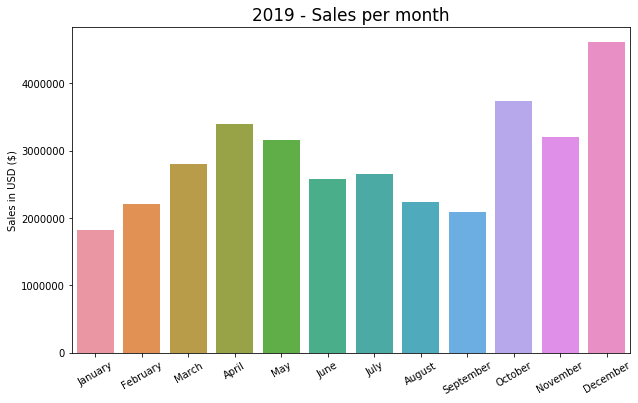

In [33]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
tick_values = range(12)

plt.figure(figsize=(10,6))

sns.barplot(sales.index, sales, )
plt.xticks(ticks = tick_values ,labels = months, rotation=30)
plt.rc("font" ,size=14)

plt.title('2019 - Sales per month')
plt.xlabel(None)
plt.ylabel('Sales in USD ($)')


plt.show()

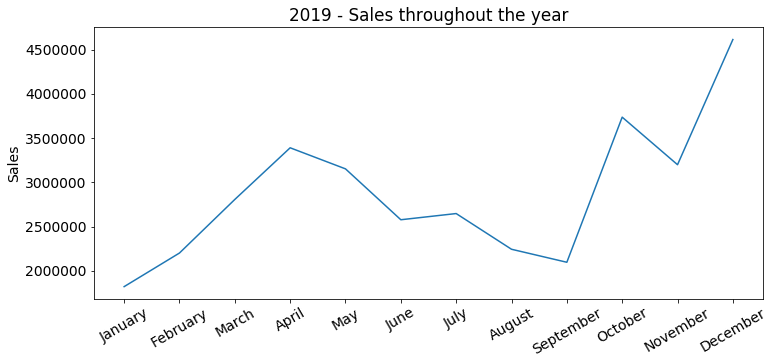

In [34]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
tick_values = sales.index

plt.figure(figsize=(12,5))

sns.lineplot(sales.index, sales, )
plt.xticks(ticks = tick_values ,labels = months, rotation=30)
plt.rc("font" ,size=14)

plt.title('2019 - Sales throughout the year')
plt.xlabel(None)

plt.show()

### 2.2 Qual cidade teve o maior número de vendas?
         Podemos obter a cidade na coluna ['Purchase Address'].
         Mas como você já sabe, esse é outro desafio.

In [35]:
'''
    Dividiremos o ['Purchase Address'] e obteremos apenas o nome da cidade.
     .apply () é uma boa função para usar nessa situação
'''

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [36]:
'''
     Usando .apply () para aplicar a função lambda em toda a coluna.
    E lambda para dividir os valores na vírgula. Exemplo:
    
         917 1st St, Dallas, TX 75001 -> ['917 1st St', 'Dallas' 'TX 75001']
    Agora temos o índice da cidade             [0]         [1]       [2]   
'''

all_data['City'] = all_data['Purchase Address'].apply(lambda column: column.split(',')[1])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


    Mas há um problema não mínimo. Algumas cidades têm 'duplicatas'. Cidades com o mesmo nome, mas
    localizado em diferentes estados. Para resolver isso, vamos também colocar o Estado ao lado do nome da cidade.
    E desta vez, vamos fazer nossa própria função para concluir a tarefa.

In [37]:
'''
    Elas basicamente farão o mesmo que antes, mas agora .strip('') removerá o espaço em branco nos valores:
    ' Dallas'  -->  'Dallas'
    
    E vamos dividir novamente (no espaço em branco) para obter o 'TX'
    
    get_city(address):
        .split(): 
            917 1st St, Dallas, TX 75001  -->  ['917 1st St', ' Dallas' ' TX 75001'] --> retorna [1]  
                   (address)                         [0]          [1]        [2]
        .strip(' '):
                ' Dallas'  -->  'Dallas'
                
                
     get_state(address):
        .split(): 
            917 1st St, Dallas, TX 75001  -->  ['917 1st St', ' Dallas' ' TX 75001'] --> retorna [2]
                   (address)                         [0]          [1]        [2]
        .split(' '):
                ' TX 75001'  -->  [' ', 'TX', '75001'] --> return [1]
                                   [0]   [1]    [2]
                                                 
    obs: no lambda, estamos usando a string formatada f '{variable} texto normal'
'''

def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [38]:
# Note que temos 2 Portlands
sales_per_city = all_data.groupby('City').sum()
sales_per_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


###  2.2 Qual cidade teve o maior número de vendas?
         Temos um vencedor: San Francisco!
        
         E, novamente, vamos plotar essa informação.

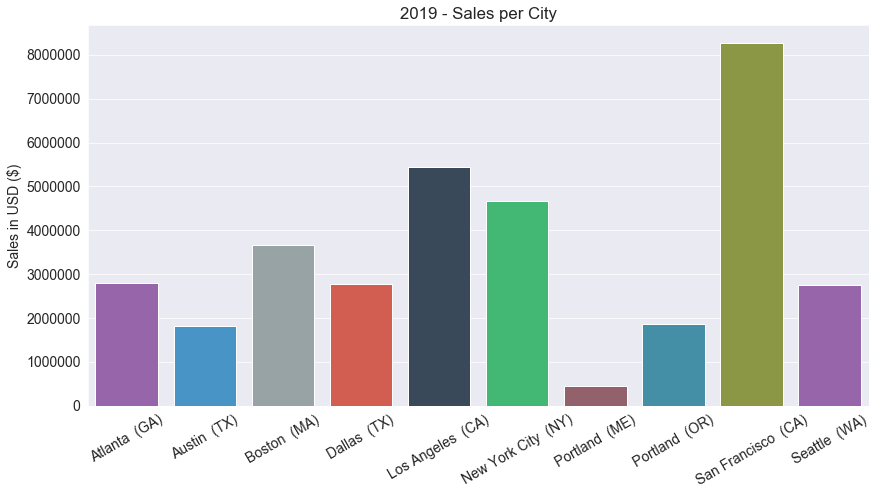

In [39]:
plt.figure(figsize=(14,7))

sns.set_style("darkgrid")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#9b5966","#3498b6",'#95a536']

sns.barplot(sales_per_city.index, sales_per_city.Sales, palette=flatui)

plt.rc("font" ,size=14)
plt.xticks(rotation=30)

plt.title('2019 - Sales per City')
plt.xlabel(None)
plt.ylabel('Sales in USD ($)')


plt.show()

### 2.3 A que horas devemos exibir anúncios para maximizar a probabilidade de compra do produto pelo cliente?
        Agora é um bom momento para usarmos o tipo de data e hora. Isso tornará nosso trabalho muito mais fácil
        devido às funcionalidades. Mesmo com o 'datetime' consumindo um pouco mais de espaço na memória.

In [41]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)


In [42]:
# Convertendo
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [43]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [44]:
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [45]:
'''
    Agora vamos preparar melhor os dados para criar um gráfico de linhas.
    Para isso precisamos de uma nova coluna para contar o número de
    eventos (basicamente número de pedidos)
'''
all_data['Count'] = 1

In [46]:
# Obtendo os valores de hora para usar no gráfico

hours = [hour for hour, df in all_data.groupby(['Hour'])]

In [47]:
all_data.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute,Count
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


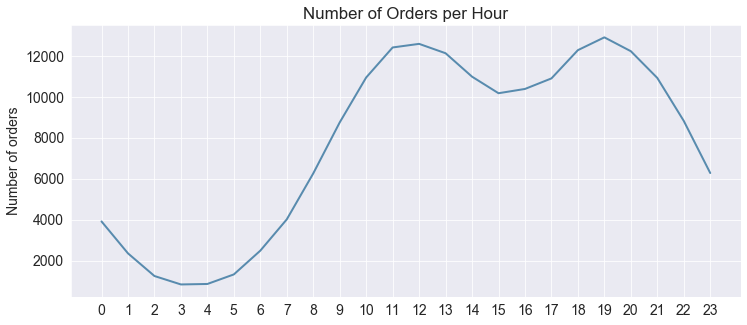

In [48]:
plt.figure(figsize=(12,5))

sns.set_style("darkgrid")

sns.lineplot(hours, all_data.groupby(['Hour']).count()['Count'], color='#588bae', linewidth=2)
plt.title('Number of Orders per Hour')
plt.xticks(hours)
plt.ylabel('Number of orders')


plt.show()

### 2.3 A que horas devemos exibir anúncios para maximizar a probabilidade de compra do produto pelo cliente?
         Olhando para o gráfico, exibir um pouco antes das 11h e 19h parece ser uma ótima opção.

### 2.4 Quais produtos são frequentemente vendidos juntos?
        Se o ID do pedido for o mesmo, isso significa que esses produtos foram comprados ao mesmo tempo,
        pelo o mesmo cliente. Podemos usar essa linha de pensamento para obter uma resposta.

In [49]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [50]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time

# Checando os 'Order ID's iguais
# keep=False (Queremos manter todas as duplicatas, pois as usaremos)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1


    Agora, precisamos 'juntar' as duplicatas, para que possamos usá-las como uma observação única.

In [51]:
df = df.copy() # Evitar warning:  https://www.youtube.com/watch?v=m34fhLaPD-U
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda product: ','.join(product))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [52]:
''' 
    Como você vê, juntamos os dois IDs, agora temos duplicatas reais.
    Precisamos removê-los.
'''
# Mantendo apenas duas colunas
product_orders = df[['Order ID', 'Grouped']].drop_duplicates()

product_orders.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [53]:
product_orders.shape

(7136, 2)

In [54]:
product_orders.Grouped

3                             Google Phone,Wired Headphones
18                        Google Phone,USB-C Charging Cable
30        Bose SoundSport Headphones,Bose SoundSport Hea...
32                      AAA Batteries (4-pack),Google Phone
119           Lightning Charging Cable,USB-C Charging Cable
                                ...                        
186781    Apple Airpods Headphones,Apple Airpods Headphones
186783    iPhone,Lightning Charging Cable,Lightning Char...
186791         34in Ultrawide Monitor,AA Batteries (4-pack)
186803              Wired Headphones,AAA Batteries (4-pack)
186841                    Google Phone,USB-C Charging Cable
Name: Grouped, Length: 7136, dtype: object

In [55]:
# https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

# Contando pares que surgem de combinações nas listas product_orders['Grouped']

count = Counter()

for row in product_orders['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(15):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58


    Sabendo disso, poderíamos tentar fazer promoções mais eficientes.
    Promoção de um 'iPhone' com um 'Lightning Charging Cable', pois as pessoas
    geralmente os ordenam juntos. Ou depois que alguém compra um 'Google Phone'
    mostrar alguns anúncios de 'Wired Headphones'.

### Quais são os produtos mais frequentemente vendidos juntos?
    iPhone e lightning charging cable. E
    Google Phone e USB-C charging cable

### 2.5 Qual produto vendeu mais?
         E para a última tarefa, algo simples.
         Só precisamos agrupar os dados por produtos
         e usar a quantidade pedida para saber
         quantos de cada produto foram pedidos.

In [56]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

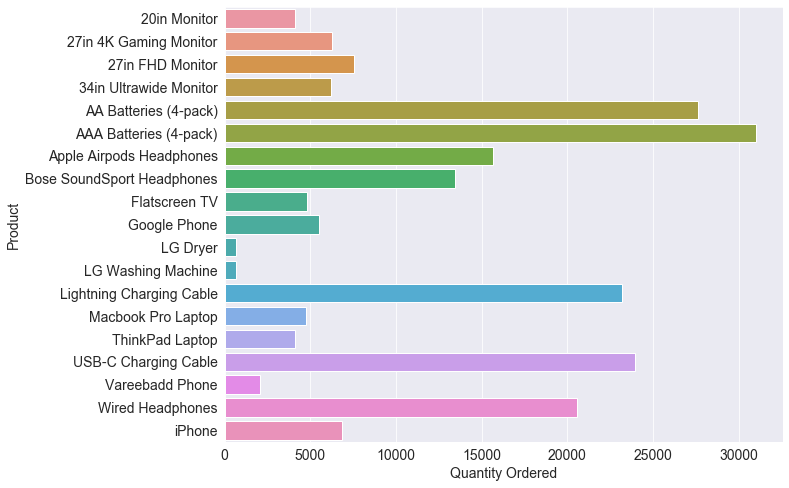

In [57]:
plt.figure(figsize=(10,8))

sns.barplot(quantity_ordered, quantity_ordered.index)

plt.show()

### 2.5 Qual produto vendeu mais?
        AAA Batteries (4-pack)